## Training Random Forest

O Random Forest é um algoritmo de aprendizado supervisionado baseado em ensemble que funciona construindo múltiplas árvores de decisão durante o treinamento e combinando suas previsões para melhorar a acurácia e reduzir o risco de overfitting. Cada árvore da floresta é criada a partir de uma amostra aleatória dos dados (com substituição, técnica conhecida como bootstrap) e, em cada divisão da árvore, é considerado um subconjunto aleatório de características para decidir o melhor ponto de divisão. Essa introdução de aleatoriedade faz com que as árvores sejam diversas entre si, aumentando a robustez do modelo final. No caso da classificação, o Random Forest decide a classe com base na votação majoritária das árvores, enquanto na regressão faz a média das previsões.

<table>
        <thead>
            <tr>
                <th rowspan="2">Modelo</th>
                <th rowspan="2">Acurácia</th>
                <th colspan="3">Precisão</th>
                <th colspan="3">Recall</th>
                <th colspan="3">F1-Score</th>
            </tr>
            <tr>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>RF - All</td>
                <td>99%</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.91</td>
                <td>0.99</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.99</td>
                <td>1.00</td>
                <td>0.95</td>
            </tr>
            <tr>
                <td>RF - Selected</td>
                <td>99%</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.91</td>
                <td>0.99</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.99</td>
                <td>1.00</td>
                <td>0.95</td>
            </tr>
</table>

### Setup

In [62]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [63]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [64]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Imagem salva como {file_path}')

### Recovering the data

In [65]:
import pandas as pd

In [66]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "dataset"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [67]:
train_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_train_resampled.csv'))

In [68]:
train_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,60,5.0,70,8.1,8.6,3.5,1.8,5.3,1.6,29.0,0
1,1,55,2.6,48,11.8,5.1,1.2,1.0,3.6,0.5,33.0,0
2,1,51,10.4,76,7.3,3.3,2.0,1.0,1.2,0.9,33.0,0
3,0,77,5.0,106,5.4,3.9,2.1,1.2,4.2,1.1,24.0,2
4,1,54,6.8,73,7.5,5.1,2.0,1.3,1.4,1.5,39.0,0


In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2025 non-null   int64  
 1   AGE     2025 non-null   int64  
 2   Urea    2025 non-null   float64
 3   Cr      2025 non-null   int64  
 4   HbA1c   2025 non-null   float64
 5   Chol    2025 non-null   float64
 6   TG      2025 non-null   float64
 7   HDL     2025 non-null   float64
 8   LDL     2025 non-null   float64
 9   VLDL    2025 non-null   float64
 10  BMI     2025 non-null   float64
 11  CLASS   2025 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 190.0 KB


In [70]:
test_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_test.csv'))

In [71]:
test_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,52,5.3,56,8.8,5.3,2.5,1.1,2.3,1.1,29.0,0
1,0,60,3.0,42,6.2,5.8,0.9,1.0,4.4,0.4,27.0,0
2,1,52,3.0,60,7.0,3.8,3.2,0.8,1.7,1.4,33.0,0
3,1,45,4.3,71,7.2,5.6,2.0,1.1,3.0,1.0,19.0,0
4,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,2


In [72]:
X_train = train_data.drop(columns=['CLASS'])
y_train = train_data['CLASS']

In [73]:
X_test = test_data.drop(columns=['CLASS'])
y_test = test_data['CLASS']

### Training with all features

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [75]:
model = RandomForestClassifier(random_state=42) 
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
y_pred = model.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9900


In [78]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        21

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       0.99      0.99      0.99       200



In [79]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[167   0   2]
 [  0  10   0]
 [  0   0  21]]


In [80]:
param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [81]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
best_params_model = grid_search.best_estimator_

In [83]:
y_pred_best = best_params_model.predict(X_test)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9900
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        21

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       0.99      0.99      0.99       200



In [84]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best))

Matriz de Confusão:
[[167   0   2]
 [  0  10   0]
 [  0   0  21]]


In [85]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [86]:
train_sizes, train_scores, val_scores = learning_curve(
  best_params_model, X_train, y_train, cv=5, scoring='accuracy', 
  train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [87]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

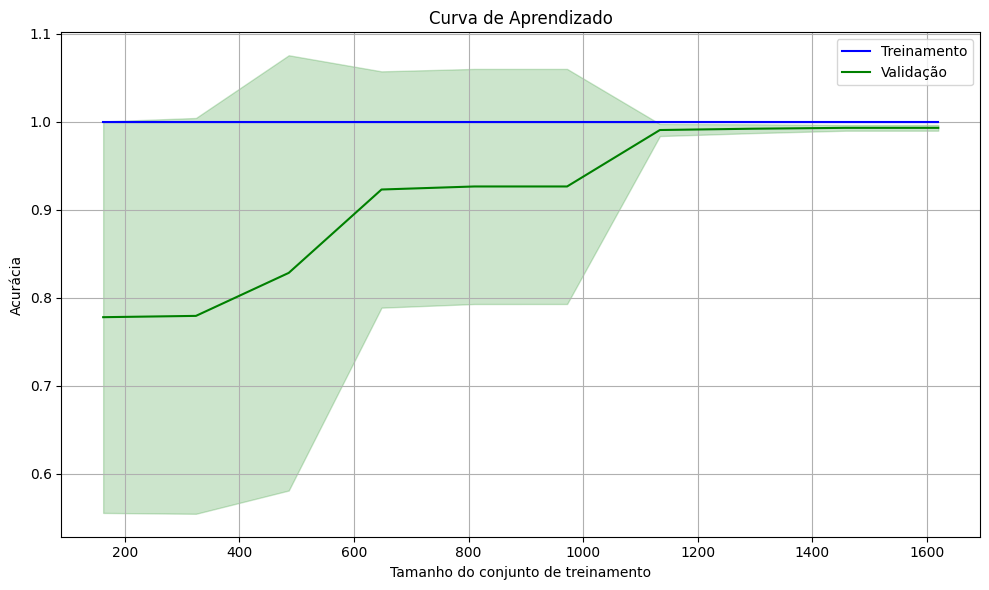

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Treinamento", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validação", color="green")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="green")

plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treinamento")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Applying cross-validation

In [89]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

In [90]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'f1': make_scorer(f1_score, average='macro')
}

In [91]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [92]:
scores = cross_validate(best_params_model, X_train, y_train, cv=skf, scoring=scoring)

In [93]:
print('Acurácia:', scores['test_accuracy'])
print('Precisão:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1-Score:', scores['test_f1'])

Acurácia: [0.99507389 0.99014778 0.99507389 0.99014778 0.99507389 0.98514851
 0.99009901 1.         0.9950495  0.9950495 ]
Precisão: [0.99509804 0.99033816 0.99516908 0.99012291 0.99509804 0.98591549
 0.99047619 1.         0.99516908 0.99516908]
Recall: [0.99509804 0.99019608 0.99509804 0.99012291 0.99509804 0.98507463
 0.99004975 1.         0.99502488 0.99502488]
F1-Score: [0.99506173 0.99012291 0.99509777 0.99012291 0.99506173 0.98517217
 0.99011858 1.         0.99506064 0.99506064]


In [94]:
print(f'\nMédia de Acurácia: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
print(f'Média de Precisão: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
print(f'Média de Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
print(f'Média de F1-Score: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')


Média de Acurácia: 0.9931 ± 0.0040
Média de Precisão: 0.9933 ± 0.0038
Média de Recall: 0.9931 ± 0.0040
Média de F1-Score: 0.9931 ± 0.0040


In [95]:
import joblib
joblib.dump(best_params_model, '../models/randomForest_model.joblib')

['../models/randomForest_model.joblib']

### Training with the best features

In [96]:
from sklearn.feature_selection import SelectKBest, f_classif

In [97]:
k_values = range(1, X_train.shape[1] + 1)
accuracy_scores = []
selected_features_dict = {}

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    model = RandomForestClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    selected_features_indices = np.where(selector.get_support())[0]

    if hasattr(X_train, 'columns'):
        selected_features_dict[k] = X_train.columns[selected_features_indices].tolist()
    else:
        selected_features_dict[k] = selected_features_indices.tolist()

In [98]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor número de características: {best_k}")

Melhor número de características: 6


In [99]:
selector_best = SelectKBest(score_func=f_classif, k=best_k)
X_train_selected = selector_best.fit_transform(X_train, y_train)
X_test_selected = selector_best.transform(X_test)

In [100]:
print("Características selecionadas para o melhor k:")
print(selected_features_dict[best_k])

Características selecionadas para o melhor k:
['Gender', 'AGE', 'HbA1c', 'Chol', 'TG', 'BMI']


In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

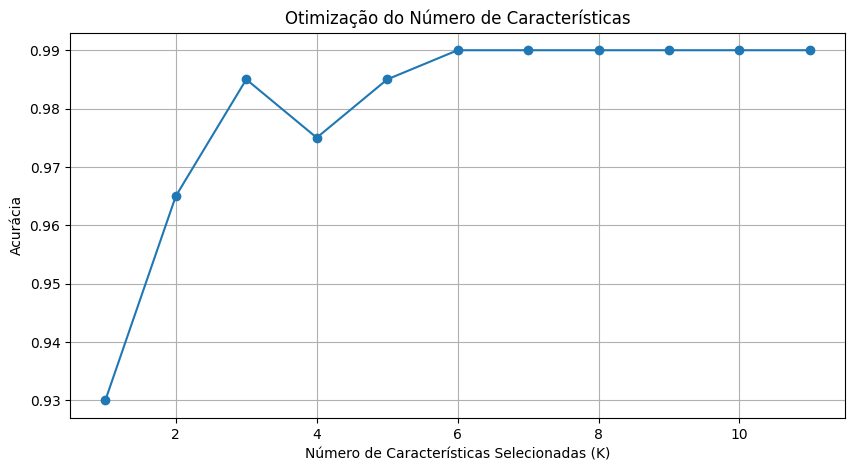

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Número de Características Selecionadas (K)')
plt.ylabel('Acurácia')
plt.title('Otimização do Número de Características')
plt.grid()
plt.show()

In [103]:
model_k = RandomForestClassifier(random_state=42)
model_k.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [104]:
y_pred = model_k.predict(X_test_selected)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9900


In [106]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        21

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       0.99      0.99      0.99       200



In [107]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[167   0   2]
 [  0  10   0]
 [  0   0  21]]


In [108]:
param_grid = {
  'n_estimators': [100, 200, 300],
  'max_depth': [None, 10, 20, 30],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model_k, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [109]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [110]:
best_model_k = grid_search.best_estimator_

In [111]:
y_pred_best = best_model_k.predict(X_test_selected)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9900
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        21

    accuracy                           0.99       200
   macro avg       0.97      1.00      0.98       200
weighted avg       0.99      0.99      0.99       200



In [112]:
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred_best)

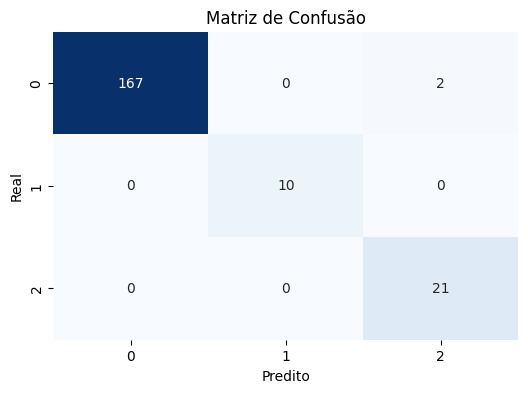

In [113]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [114]:
train_sizes, train_scores, val_scores = learning_curve(
  best_model_k, X_train, y_train, cv=5, scoring='accuracy', 
  train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [115]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

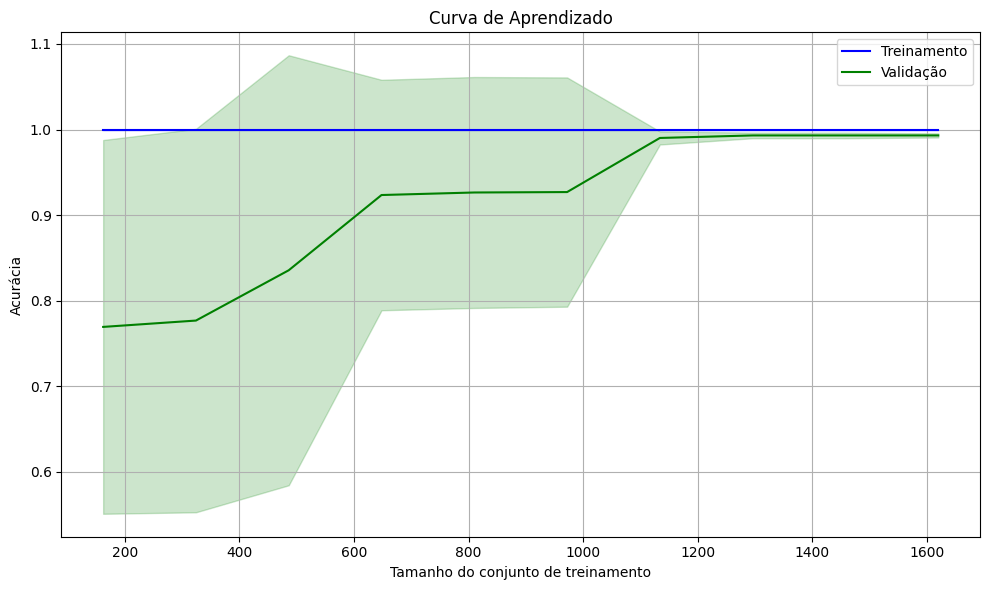

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Treinamento", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validação", color="green")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="green")

plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treinamento")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
joblib.dump(best_model_k, '../models/randomForest_KBest_model.joblib')

['../models/randomForest_KBest_model.joblib']

#### Applying cross-validation

In [118]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'f1': make_scorer(f1_score, average='macro')
}

In [119]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [120]:
scores = cross_validate(best_model_k, X_train_selected, y_train, cv=skf, scoring=scoring)

In [121]:
print('Acurácia:', scores['test_accuracy'])
print('Precisão:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1-Score:', scores['test_f1'])

Acurácia: [0.99014778 0.99507389 1.         0.99507389 0.99507389 0.99009901
 0.99009901 1.         0.9950495  0.9950495 ]
Precisão: [0.99019608 0.99509804 1.         0.99509804 0.99509804 0.99047619
 0.99047619 1.         0.99516908 0.99516908]
Recall: [0.99019608 0.99509804 1.         0.99509804 0.99509804 0.99004975
 0.99004975 1.         0.99502488 0.99502488]
F1-Score: [0.99015977 0.99506173 1.         0.99506173 0.99506173 0.99011858
 0.99011858 1.         0.99506064 0.99506064]


In [122]:
print(f'\nMédia de Acurácia: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
print(f'Média de Precisão: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
print(f'Média de Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
print(f'Média de F1-Score: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')


Média de Acurácia: 0.9946 ± 0.0035
Média de Precisão: 0.9947 ± 0.0034
Média de Recall: 0.9946 ± 0.0035
Média de F1-Score: 0.9946 ± 0.0035
